In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Import data

In [7]:
df = pd.read_csv("heart.csv")
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2,1
68,44,1,1,120,220,0,1,170,0,0.0,2,0,2,1
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2,1
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1
244,56,1,0,132,184,0,0,105,1,2.1,1,1,1,0
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2,1
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2,1


## 2) Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Null Values & Duplicates

In [24]:
#Null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [26]:
#Duplicates
df.duplicated().sum()

1

In [27]:
df.drop_duplicates() #Let's drop duplicates 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Distributions - Numerical Features

In [19]:
#numerical features
df_num = df.loc[:,['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
df_num.head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


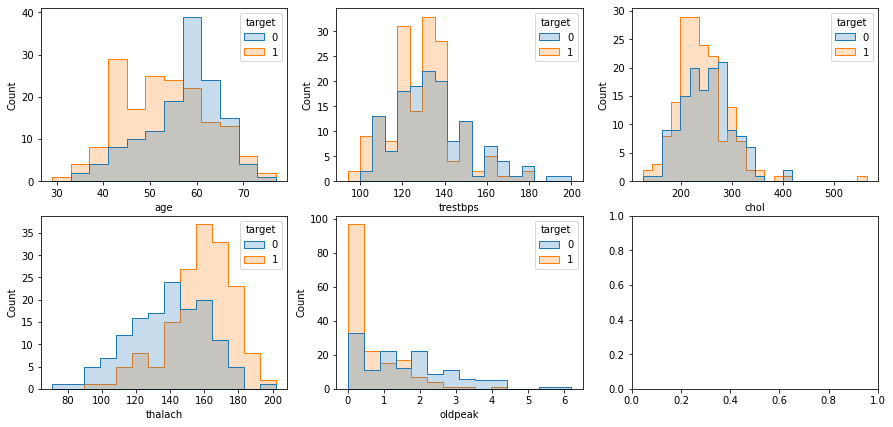

In [97]:
n_rows=2
n_cols=3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 7))

for i, column in enumerate(df_num.columns):
    sns.histplot(x=df_num[column], hue=df['target'], element='step', ax=axes[i//n_cols,i%n_cols])
plt.show()

### Correlation - Numerical Features

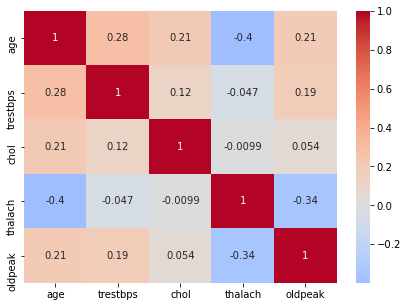

In [143]:
#correlation among numerical features
num_corr = df_num.corr()

plt.subplots(figsize=(7,5))
sns.heatmap(num_corr, center=0, annot=True, cmap='coolwarm')
plt.show()

In [21]:
#categorical features
df_cat = df.loc[:,['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']]
df_cat.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1


### Distributions - Categorical Features

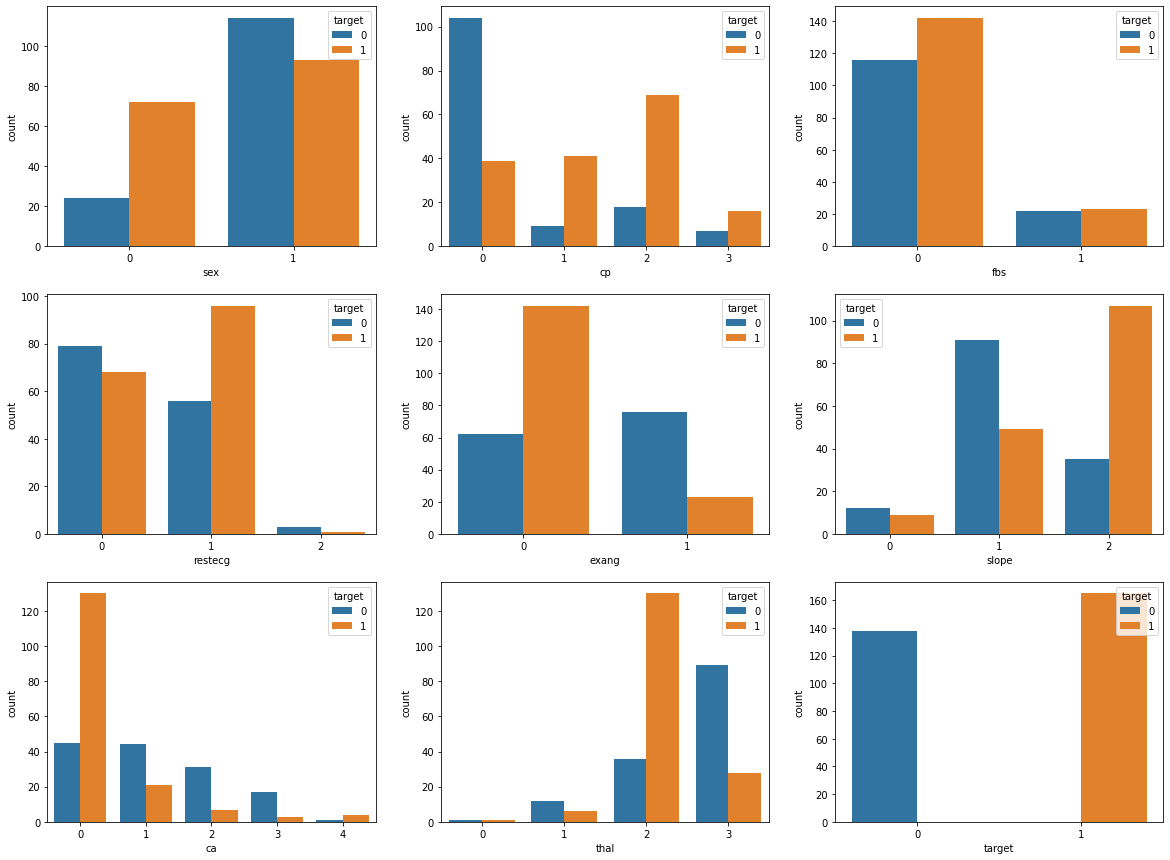

In [146]:
n_rows=3
n_cols=3

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20,15))

for i, column in enumerate(df_cat.columns):
    sns.countplot(data=df_cat, x=column, hue='target', saturation=0.75, ax=axes[i//n_cols,i%n_cols])
plt.show()

## 3) Pre-processing

### Scaling

In [151]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler =  MinMaxScaler(copy=False,feature_range=(0, 1))

scaled_df = pd.DataFrame(mm_scaler.fit_transform(df), columns = df.columns)

In [152]:
scaled_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


### Split into Train and Test set 

In [156]:
X = scaled_df.iloc[:,0:-1] #from 'age' to 'thal'
y = scaled_df.iloc[:,-1] #'target'

In [154]:
from sklearn.model_selection import train_test_split

#Split data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30,
                                                    random_state=123,
                                                    stratify=y)
print(X_train.shape,X_test.shape)

(212, 13) (91, 13)


## 4) Model

### Logistic Regression

#### GridSearch

In [157]:
#Define Classifier and Parameters
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10],"penalty":['l1','l2'] , "max_iter":[1000]}

In [158]:
#Define GridSearch
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1, refit=True)

In [162]:
#Train the Classifier
gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\marco\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.70334744        nan 0.70334744        nan 0.76657996
        nan 0.84490407        nan 0.83967812        nan 0.83483183]
  warnings.warn(


In [161]:
#Print the results
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.844904 using {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2'}
nan (nan) with: {'C': 0.0001, 'max_iter': 1000, 'penalty': 'l1'}
0.703347 (0.004842) with: {'C': 0.0001, 'max_iter': 1000, 'penalty': 'l2'}
nan (nan) with: {'C': 0.001, 'max_iter': 1000, 'penalty': 'l1'}
0.703347 (0.004842) with: {'C': 0.001, 'max_iter': 1000, 'penalty': 'l2'}
nan (nan) with: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l1'}
0.766580 (0.023705) with: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2'}
nan (nan) with: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l1'}
0.844904 (0.039376) with: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2'}
nan (nan) with: {'C': 1, 'max_iter': 1000, 'penalty': 'l1'}
0.839678 (0.042826) with: {'C': 1, 'max_iter': 1000, 'penalty': 'l2'}
nan (nan) with: {'C': 10, 'max_iter': 1000, 'penalty': 'l1'}
0.834832 (0.052243) with: {'C': 10, 'max_iter': 1000, 'penalty': 'l2'}


#### Test the best model

In [163]:
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

In [164]:
print(gs.best_estimator_.coef_)
print(X_train.columns)

[[-0.13769807 -0.59974138  0.70132155 -0.2004988  -0.04439262  0.07684588
   0.22450185  0.38611008 -0.8515129  -0.47102225  0.51972162 -0.54625641
  -0.38971054]]
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


#### Metrics

In [165]:
#F1 scores
from sklearn import metrics

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))

***RESULTS ON TRAIN SET***
f1_score:  0.8387096774193548
--
***RESULTS ON TEST SET***
f1_score:  0.8000000000000002


In [166]:
#Some further metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.68      0.73        41
         1.0       0.76      0.84      0.80        50

    accuracy                           0.77        91
   macro avg       0.77      0.76      0.76        91
weighted avg       0.77      0.77      0.77        91



<AxesSubplot:>

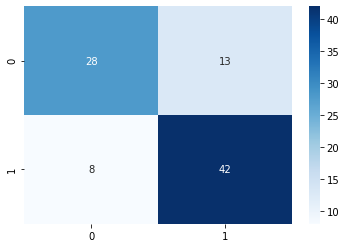

In [171]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")

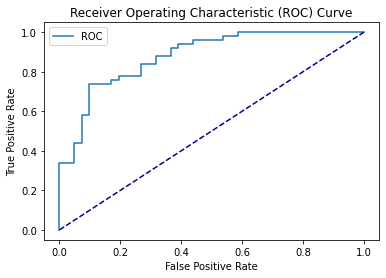

AUC: 0.88


In [173]:
#Roc Curve and AUC
from sklearn import metrics

model = best_model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)